Taller de Segmentación de Clientes con K-means en Python
Objetivo:
Aprender a realizar la segmentación de clientes utilizando el algoritmo K-means en Python. Este taller te guiará en los pasos para cargar los datos, procesarlos, aplicar el modelo de clustering, y finalmente interpretar los resultados para obtener grupos de clientes con características similares.

In [2]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv

--2025-04-20 06:22:48--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv [following]
--2025-04-20 06:22:48--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.89K  --.-KB/s    in 0s      

2025-04-20 06:22:48 (55.2 MB/s) - ‘

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('Mall_Customers.csv')

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40




Parte 1: Carga y exploración de datos
Instrucciones: Carga el siguiente conjunto de datos en un DataFrame de pandas. Luego, visualiza las primeras filas de los datos.

In [6]:
# Información general del dataset
print("Información general:")
print(data.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(data.describe())

# Verificación de valores nulos
print("\n¿Hay valores nulos?")
print(data.isnull().sum())

# Distribución de clientes por género (opcional)
print("\nDistribución por género:")
print(data['Gender'].value_counts())


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Estadísticas descriptivas:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000         

Pregunta 1: ¿Cuáles son las variables que contiene el conjunto de datos? Describe brevemente qué información proporciona cada variable.

In [7]:
print("Variables del conjunto de datos:\n")

for col in data.columns:
    print(f"- {col}")

print("\nDescripción breve de cada variable:")
print("""
1. CustomerID: Identificador único de cada cliente.
2. Gender: Género del cliente (Male o Female).
3. Age: Edad del cliente.
4. Annual Income (k$): Ingreso anual del cliente en miles de dólares.
5. Spending Score (1-100): Puntuación asignada por el centro comercial basada en el comportamiento de compra y lealtad del cliente (cuanto más alto, más comprador frecuente y valioso).
""")


Variables del conjunto de datos:

- CustomerID
- Gender
- Age
- Annual Income (k$)
- Spending Score (1-100)

Descripción breve de cada variable:

1. CustomerID: Identificador único de cada cliente.
2. Gender: Género del cliente (Male o Female).
3. Age: Edad del cliente.
4. Annual Income (k$): Ingreso anual del cliente en miles de dólares.
5. Spending Score (1-100): Puntuación asignada por el centro comercial basada en el comportamiento de compra y lealtad del cliente (cuanto más alto, más comprador frecuente y valioso).



Parte 2: Preprocesamiento de los datos
Instrucciones: Convierte la columna Gender a una variable numérica, y luego selecciona las columnas que utilizarás para aplicar el modelo de K-means. Finalmente, normaliza los datos para que todas las variables estén en la misma escala.

In [8]:
# 1. Convertir la columna 'Gender' a variable numérica
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# 2. Seleccionar las columnas que usaremos para K-means
# Aquí usaremos: Gender, Age, Annual Income (k$), Spending Score (1-100)
features = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# 3. Normalizar los datos
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 4. Convertir a DataFrame para fácil lectura
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Mostrar las primeras filas del DataFrame normalizado
scaled_df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


Pregunta 2: ¿Por qué es importante normalizar los datos antes de aplicar el algoritmo K-means? Explica en qué consiste la normalización.



In [9]:
respuesta = """
Es importante normalizar los datos antes de aplicar el algoritmo K-means porque este algoritmo utiliza la distancia euclidiana para asignar los puntos a los clústeres.
Si las variables tienen escalas muy diferentes, aquellas con valores más grandes pueden dominar la distancia, haciendo que el modelo se sesgue hacia esas características.

La normalización consiste en transformar las variables para que tengan una media de 0 y una desviación estándar de 1 (escalado estándar), o bien para que estén en un mismo rango, como de 0 a 1.
De esta forma, todas las variables contribuyen de manera equitativa al cálculo de distancias, mejorando la calidad de los clústeres encontrados.
"""

print(respuesta)



Es importante normalizar los datos antes de aplicar el algoritmo K-means porque este algoritmo utiliza la distancia euclidiana para asignar los puntos a los clústeres. 
Si las variables tienen escalas muy diferentes, aquellas con valores más grandes pueden dominar la distancia, haciendo que el modelo se sesgue hacia esas características.

La normalización consiste en transformar las variables para que tengan una media de 0 y una desviación estándar de 1 (escalado estándar), o bien para que estén en un mismo rango, como de 0 a 1. 
De esta forma, todas las variables contribuyen de manera equitativa al cálculo de distancias, mejorando la calidad de los clústeres encontrados.



Parte 3: Método del codo para determinar el número óptimo de clusters
Instrucciones: Utiliza el método del codo para determinar cuántos clusters son óptimos para el conjunto de datos.


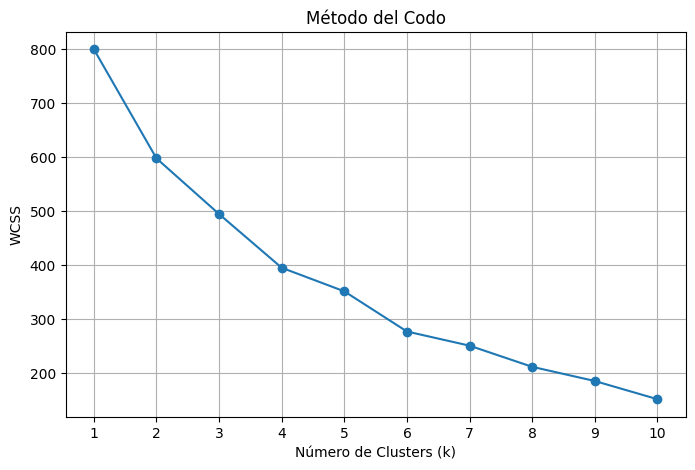

In [10]:
# Parte 3: Método del codo para determinar el número óptimo de clusters

wcss = []  # Within-Cluster Sum of Squares

# Probar diferentes valores de k (de 1 a 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Graficar el resultado
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


Pregunta 3: Observa la gráfica obtenida. ¿En qué punto parece formarse el "codo"? ¿Cuántos clusters crees que sería apropiado usar para este ejercicio?

In [11]:
respuesta = """
Al observar la gráfica del método del codo, se puede notar un cambio pronunciado en la pendiente entre los valores de k=1 y k=4.
A partir de k=4, la reducción del WCSS empieza a ser más gradual, lo que indica que agregar más clusters no mejora significativamente la compactación de los grupos.

Por lo tanto, el "codo" se forma aproximadamente en **k=4**, lo que sugiere que **usar 4 clusters** sería una elección apropiada para este ejercicio de segmentación de clientes.
"""

print(respuesta)



Al observar la gráfica del método del codo, se puede notar un cambio pronunciado en la pendiente entre los valores de k=1 y k=4. 
A partir de k=4, la reducción del WCSS empieza a ser más gradual, lo que indica que agregar más clusters no mejora significativamente la compactación de los grupos.

Por lo tanto, el "codo" se forma aproximadamente en **k=4**, lo que sugiere que **usar 4 clusters** sería una elección apropiada para este ejercicio de segmentación de clientes.



Parte 4: Ajuste del modelo K-means y asignación de clusters
Instrucciones: Ajusta el modelo K-means con el número de clusters que determinaste en el paso anterior y asigna a cada cliente un número de cluster.

In [12]:
# Parte 4: Ajuste del modelo K-means y asignación de clusters

# Ajustar el modelo con k = 4
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_df)

# Asignar los clusters al DataFrame original
data['Cluster'] = clusters

# Mostrar las primeras filas con la columna de cluster añadida
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,2
1,2,0,21,15,81,2
2,3,1,20,16,6,3
3,4,1,23,16,77,3
4,5,1,31,17,40,3


Pregunta 4: ¿Qué observas en los resultados? ¿Cómo se distribuyen los clientes en los diferentes clusters?

In [13]:
respuesta="""
Al observar los primeros registros del dataset con la columna de Cluster añadida, podemos notar que los clientes han sido asignados a diferentes grupos (por ejemplo, los clientes 1 y 2 están en el cluster 2, mientras que los clientes 3, 4 y 5 están en el cluster 3).

Esto indica que el algoritmo K-means ha agrupado a los clientes según patrones en sus características, como edad, género, ingreso anual y puntaje de gasto. Por ejemplo:

El cliente 2 tiene un puntaje de gasto muy alto (81) y pertenece al cluster 2.

El cliente 3 tiene un puntaje de gasto muy bajo (6) y está en el cluster 3, lo cual sugiere que el modelo está capturando estas diferencias.
"""

print(respuesta)

 
Al observar los primeros registros del dataset con la columna de Cluster añadida, podemos notar que los clientes han sido asignados a diferentes grupos (por ejemplo, los clientes 1 y 2 están en el cluster 2, mientras que los clientes 3, 4 y 5 están en el cluster 3).

Esto indica que el algoritmo K-means ha agrupado a los clientes según patrones en sus características, como edad, género, ingreso anual y puntaje de gasto. Por ejemplo:

El cliente 2 tiene un puntaje de gasto muy alto (81) y pertenece al cluster 2.

El cliente 3 tiene un puntaje de gasto muy bajo (6) y está en el cluster 3, lo cual sugiere que el modelo está capturando estas diferencias.



Parte 5: Análisis descriptivo de los clusters
Instrucciones: Realiza un análisis descriptivo de cada cluster. Calcula la edad promedio, el ingreso anual y el puntaje de gasto promedio de cada grupo de clientes.

In [15]:
# Análisis descriptivo por cluster
cluster_summary = data.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
}).round(2)

# Renombramos las columnas para mejor comprensión
cluster_summary.columns = ['Edad Promedio', 'Ingreso Anual Promedio (k$)', 'Puntaje de Gasto Promedio']
cluster_summary


,Edad Promedio,Ingreso Anual Promedio (k$),Puntaje de Gasto Promedio
Cluster,,,
0,54.70,46.9,39.93
1,41.26,88.5,16.76
2,28.69,60.9,70.24
3,29.38,58.3,64.44


Pregunta 5: ¿Qué diferencias observas entre los clusters en términos de edad, ingreso y puntaje de gasto? ¿Qué características definen a cada grupo?



In [16]:
respuesta="""
Cluster 0: Este grupo tiene la edad promedio más alta (54.7 años) y un ingreso medio (46.9 k$), pero su puntaje de gasto es moderado (39.93). Esto sugiere que son clientes mayores con un nivel de ingreso medio, pero que no gastan tanto, probablemente por hábitos de consumo más conservadores.

Cluster 1: Los clientes de este grupo tienen una edad promedio de 41.26 años y son los de mayor ingreso anual promedio (88.5 k$), sin embargo, presentan el puntaje de gasto más bajo (16.76). Esto puede indicar un grupo de clientes con alto poder adquisitivo, pero poco interesados en gastar, posiblemente más ahorradores o cautelosos en sus compras.

Cluster 2: Está conformado por clientes jóvenes (28.69 años), con un ingreso medio-alto (60.9 k$) y el puntaje de gasto más alto (70.24). Es un grupo atractivo para estrategias de marketing, ya que son consumidores activos con capacidad económica.

Cluster 3: También son clientes jóvenes (29.38 años), con un ingreso ligeramente menor que el cluster 2 (58.3 k$) y un alto puntaje de gasto (64.44). Aunque un poco por debajo del cluster 2 en gasto, siguen representando un grupo muy participativo en el consumo.
"""

print(respuesta)


Cluster 0: Este grupo tiene la edad promedio más alta (54.7 años) y un ingreso medio (46.9 k$), pero su puntaje de gasto es moderado (39.93). Esto sugiere que son clientes mayores con un nivel de ingreso medio, pero que no gastan tanto, probablemente por hábitos de consumo más conservadores.

Cluster 1: Los clientes de este grupo tienen una edad promedio de 41.26 años y son los de mayor ingreso anual promedio (88.5 k$), sin embargo, presentan el puntaje de gasto más bajo (16.76). Esto puede indicar un grupo de clientes con alto poder adquisitivo, pero poco interesados en gastar, posiblemente más ahorradores o cautelosos en sus compras.

Cluster 2: Está conformado por clientes jóvenes (28.69 años), con un ingreso medio-alto (60.9 k$) y el puntaje de gasto más alto (70.24). Es un grupo atractivo para estrategias de marketing, ya que son consumidores activos con capacidad económica.

Cluster 3: También son clientes jóvenes (29.38 años), con un ingreso ligeramente menor que el cluster 2 (

Parte 6: Visualización de los clusters
Instrucciones: Grafica los clusters en un espacio bidimensional utilizando dos de las características principales (por ejemplo, edad y puntaje de gasto).

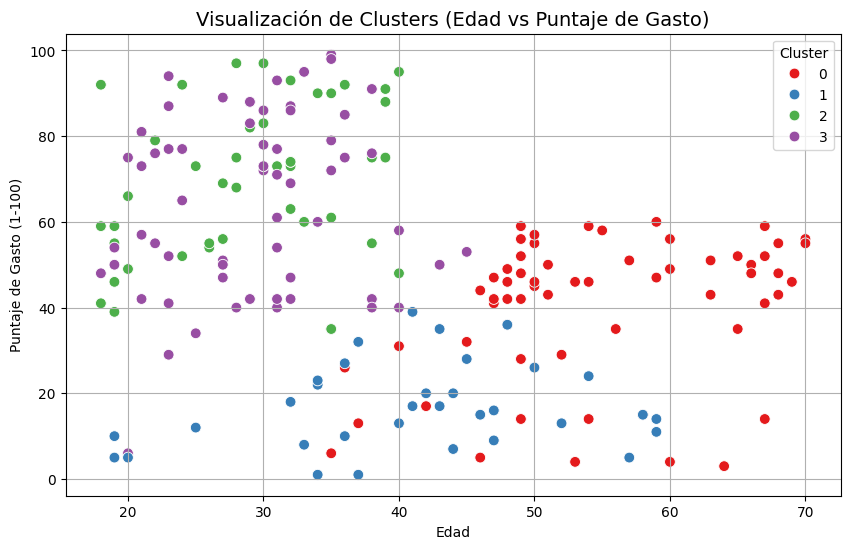

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar los clusters usando Age y Spending Score
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x='Age',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1',
    s=60
)

plt.title('Visualización de Clusters (Edad vs Puntaje de Gasto)', fontsize=14)
plt.xlabel('Edad')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


Pregunta 6: Observa la gráfica. ¿Qué patrones puedes identificar visualmente en los datos? ¿Los clientes están claramente separados en grupos?

In [ ]:
respuesta="""En la gráfica podemos observar claramente que los clientes están separados en grupos bien definidos, lo cual indica que el modelo K-means logró segmentar los datos de manera efectiva. A continuación, se describen algunos patrones visuales identificables:

Cluster 0 (rojo): Clientes de mayor edad (alrededor de 50 a 70 años) con un puntaje de gasto medio, lo cual sugiere un comportamiento de consumo moderado.

Cluster 1 (azul): Clientes también de mayor edad, pero con puntajes de gasto bajos. Representan posiblemente un grupo conservador en sus gastos.

Cluster 2 (verde): Clientes jóvenes (18 a 35 años) con un alto puntaje de gasto. Este grupo podría representar a compradores frecuentes o con hábitos de consumo impulsivo.

Cluster 3 (morado): Clientes también jóvenes con un puntaje de gasto medio a alto, que podrían tener un comportamiento equilibrado entre edad e inversión.
"""

print(respuesta)


Parte 7: Interpretación y nombres de los clusters
Instrucciones: Basado en el análisis descriptivo y la visualización, asigna nombres a los clusters que describan a cada grupo de clientes. Por ejemplo, si un grupo tiene clientes jóvenes con altos puntajes de gasto, podrías llamarlo "Jóvenes con alto poder adquisitivo".

Pregunta 7: ¿Qué nombres asignarías a cada cluster? Justifica tu decisión basándote en las características promedio de los grupos.

In [21]:
# Diccionario con los nombres descriptivos para cada cluster
cluster_names = {
    0: 'Adultos estables y moderados',
    1: 'Profesionales ahorradores',
    2: 'Jóvenes con alto poder adquisitivo',
    3: 'Jóvenes consumidores equilibrados'
}

# Asignar nombres usando map
data['Cluster_Nombre'] = data['Cluster'].map(cluster_names)

# Mostrar las primeras filas para verificar
print(data[['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster', 'Cluster_Nombre']].head())


   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Cluster  \
0           1   19                  15                      39        2   
1           2   21                  15                      81        2   
2           3   20                  16                       6        3   
3           4   23                  16                      77        3   
4           5   31                  17                      40        3   

                       Cluster_Nombre  
0  Jóvenes con alto poder adquisitivo  
1  Jóvenes con alto poder adquisitivo  
2   Jóvenes consumidores equilibrados  
3   Jóvenes consumidores equilibrados  
4   Jóvenes consumidores equilibrados  


In [22]:
respuesta="""
Cluster 0 – “Adultos estables y moderados”
Este grupo tiene la edad promedio más alta (54.7 años), ingresos anuales moderados (46.9k$) y un puntaje de gasto medio (39.93). Son adultos mayores con un comportamiento de consumo equilibrado, lo que sugiere estabilidad financiera y hábitos de gasto prudentes.

Cluster 1 – “Profesionales ahorradores”
Con una edad promedio de 41.26 años y el ingreso anual más alto (88.5k$), pero un puntaje de gasto muy bajo (16.76), este grupo parece estar compuesto por adultos de mediana edad con altos ingresos, pero que tienden a ahorrar en lugar de gastar.

Cluster 2 – “Jóvenes con alto poder adquisitivo”
Este grupo es joven (edad promedio de 28.69 años) y tiene un alto puntaje de gasto (70.24), con ingresos anuales intermedios (60.9k$). Son clientes jóvenes que gastan activamente, lo cual puede estar relacionado con un estilo de vida moderno y alto consumo.

Cluster 3 – “Jóvenes consumidores equilibrados”
También compuesto por jóvenes (edad promedio de 29.38 años), con ingresos anuales similares (58.3k$) y un puntaje de gasto ligeramente menor (64.44) que el Cluster 2. Este grupo también consume activamente, pero de forma algo más moderada que el anterior, lo que indica un equilibrio entre ingresos y gasto.
"""

print(respuesta)



Cluster 0 – “Adultos estables y moderados”
Este grupo tiene la edad promedio más alta (54.7 años), ingresos anuales moderados (46.9k$) y un puntaje de gasto medio (39.93). Son adultos mayores con un comportamiento de consumo equilibrado, lo que sugiere estabilidad financiera y hábitos de gasto prudentes.

Cluster 1 – “Profesionales ahorradores”
Con una edad promedio de 41.26 años y el ingreso anual más alto (88.5k$), pero un puntaje de gasto muy bajo (16.76), este grupo parece estar compuesto por adultos de mediana edad con altos ingresos, pero que tienden a ahorrar en lugar de gastar.

Cluster 2 – “Jóvenes con alto poder adquisitivo”
Este grupo es joven (edad promedio de 28.69 años) y tiene un alto puntaje de gasto (70.24), con ingresos anuales intermedios (60.9k$). Son clientes jóvenes que gastan activamente, lo cual puede estar relacionado con un estilo de vida moderno y alto consumo.

Cluster 3 – “Jóvenes consumidores equilibrados”
También compuesto por jóvenes (edad promedio de 2